## Vocabulary size exploration

### Load the full training data, and inspect token frequencies with different vocabulary sized

In [58]:
from pathlib import Path
import sys
import os

sys.path.append(os.path.abspath('..'))

from miditok import REMI, TokenizerConfig
from miditok.pytorch_data import DatasetMIDI

lakh5k_ids = [f"lakh5k_voc{i}k" for i in [5, 8, 10, 20]]

# Create tokenizer objects
lakh5k_tokenizers = [
    REMI(params=f"./tokenizers/{config}.json")
    for config in lakh5k_ids
]

# Create data paths
lakh5k_data_path = Path("../data/chunked_lakh5k")
lakh5k_files = list(lakh5k_data_path.glob("**/*.mid")) + list(lakh5k_data_path.glob("**/*.midi"))

# Build DatasetMIDI datasets
lakh5k_datasets = [
    DatasetMIDI(
        files_paths=lakh5k_files,
        tokenizer=tokenizer,
        max_seq_len=1024,
        bos_token_id=tokenizer["BOS_None"],
        eos_token_id=tokenizer["EOS_None"],
    )
    for tokenizer in lakh5k_tokenizers
]

print(lakh5k_datasets[0].tokenizer.vocab_size)
print(lakh5k_datasets[1].tokenizer.vocab_size)
print(lakh5k_datasets[2].tokenizer.vocab_size)
print(lakh5k_datasets[3].tokenizer.vocab_size)

5000
8000
10000
20000



Merge Depths for 5k:
  1 parts: 345 tokens
  2 parts: 1347 tokens
  3 parts: 2987 tokens
  4 parts: 266 tokens
  5 parts: 22 tokens
  6 parts: 27 tokens
  7 parts: 2 tokens
  8 parts: 1 tokens
  9 parts: 3 tokens


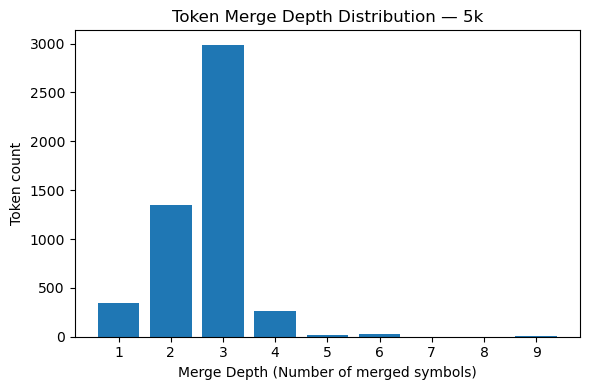


Merge Depths for 8k:
  1 parts: 345 tokens
  2 parts: 2195 tokens
  3 parts: 4735 tokens
  4 parts: 539 tokens
  5 parts: 93 tokens
  6 parts: 75 tokens
  7 parts: 7 tokens
  8 parts: 3 tokens
  9 parts: 6 tokens
  10 parts: 1 tokens
  11 parts: 1 tokens


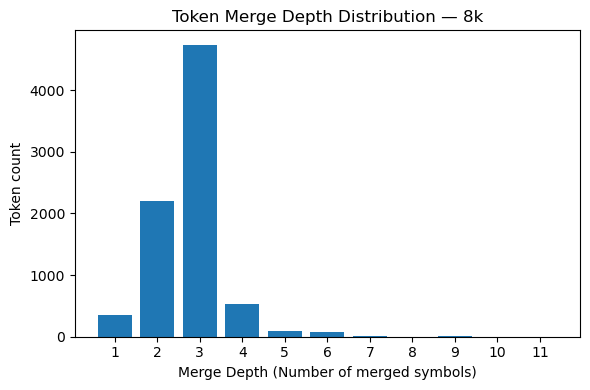


Merge Depths for 10k:
  1 parts: 345 tokens
  2 parts: 2757 tokens
  3 parts: 5738 tokens
  4 parts: 812 tokens
  5 parts: 178 tokens
  6 parts: 133 tokens
  7 parts: 13 tokens
  8 parts: 9 tokens
  9 parts: 9 tokens
  10 parts: 2 tokens
  11 parts: 1 tokens
  13 parts: 1 tokens
  17 parts: 1 tokens
  18 parts: 1 tokens


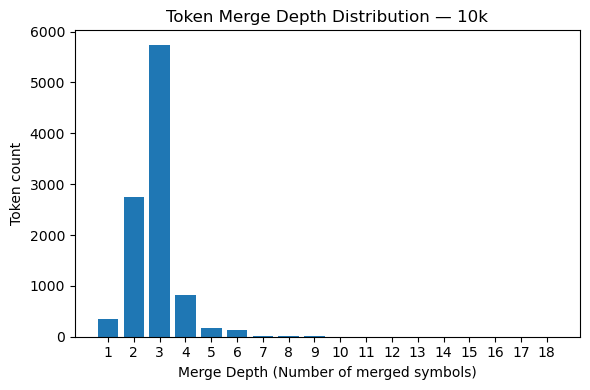


Merge Depths for 20k:
  1 parts: 345 tokens
  2 parts: 4849 tokens
  3 parts: 9748 tokens
  4 parts: 3046 tokens
  5 parts: 729 tokens
  6 parts: 825 tokens
  7 parts: 149 tokens
  8 parts: 103 tokens
  9 parts: 79 tokens
  10 parts: 28 tokens
  11 parts: 10 tokens
  12 parts: 9 tokens
  13 parts: 9 tokens
  14 parts: 10 tokens
  15 parts: 2 tokens
  16 parts: 5 tokens
  17 parts: 3 tokens
  18 parts: 8 tokens
  19 parts: 1 tokens
  20 parts: 5 tokens
  22 parts: 4 tokens
  24 parts: 3 tokens
  25 parts: 1 tokens
  26 parts: 3 tokens
  27 parts: 1 tokens
  29 parts: 1 tokens
  30 parts: 3 tokens
  31 parts: 2 tokens
  32 parts: 2 tokens
  33 parts: 1 tokens
  34 parts: 1 tokens
  35 parts: 2 tokens
  36 parts: 1 tokens
  50 parts: 1 tokens
  56 parts: 2 tokens
  58 parts: 1 tokens
  59 parts: 1 tokens
  62 parts: 1 tokens
  63 parts: 1 tokens
  66 parts: 1 tokens
  69 parts: 1 tokens
  72 parts: 1 tokens
  104 parts: 1 tokens
  162 parts: 1 tokens


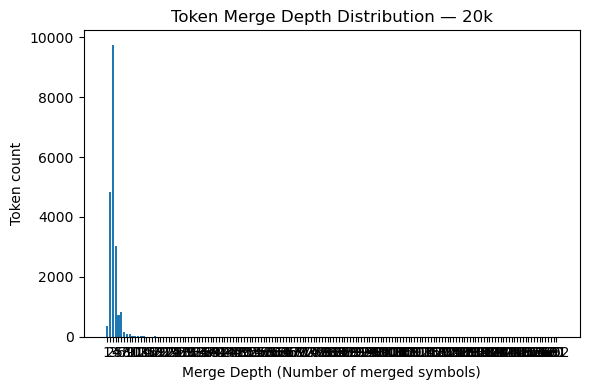

In [59]:
from collections import Counter
import matplotlib.pyplot as plt

vocab_sizes = ["5k", "8k", "10k", "20k"]
merge_depth_data = []

for tokenizer, label in zip(lakh5k_tokenizers, vocab_sizes):
    merge_keys = tokenizer._vocab_learned_bytes_to_tokens.keys()
    
    # Length of the byte sequence gives us merge depth
    merge_depths = [len(key) for key in merge_keys]
    counter = Counter(merge_depths)
    merge_depth_data.append(counter)

    print(f"\nMerge Depths for {label}:")
    for depth, count in sorted(counter.items()):
        print(f"  {depth} parts: {count} tokens")

    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(counter.keys(), counter.values())
    plt.title(f"Token Merge Depth Distribution — {label}")
    plt.xlabel("Merge Depth (Number of merged symbols)")
    plt.ylabel("Token count")
    plt.xticks(range(1, max(counter.keys()) + 1))
    plt.tight_layout()
    plt.show()

In [60]:
for tokenizer in lakh5k_tokenizers:
    # Find tokens made of exactly 6 merged parts
    print(f"Processing tokenizer: {tokenizer}")
    for token_bytes in tokenizer._vocab_learned_bytes_to_tokens.values():
        if len(token_bytes) == 6:
            print(token_bytes)


Processing tokenizer: 5000 tokens with ('I', 'T') io format, trained with BPE
['PitchDrum_42', 'Velocity_31', 'Duration_0.2.16', 'PitchDrum_69', 'Velocity_23', 'Duration_0.2.16']
['PitchDrum_54', 'Velocity_103', 'Duration_0.4.16', 'PitchDrum_54', 'Velocity_103', 'Duration_0.4.16']
['PitchDrum_54', 'Velocity_23', 'Duration_0.3.16', 'PitchDrum_69', 'Velocity_39', 'Duration_0.3.16']
['PitchDrum_44', 'Velocity_71', 'Duration_0.3.16', 'PitchDrum_81', 'Velocity_71', 'Duration_0.3.16']
['PitchDrum_54', 'Velocity_39', 'Duration_0.3.16', 'PitchDrum_69', 'Velocity_47', 'Duration_0.3.16']
Processing tokenizer: 8000 tokens with ('I', 'T') io format, trained with BPE
['PitchDrum_38', 'Velocity_127', 'Duration_0.1.16', 'PitchDrum_42', 'Velocity_63', 'Duration_0.1.16']
['PitchDrum_42', 'Velocity_71', 'Duration_0.3.16', 'PitchDrum_37', 'Velocity_47', 'Duration_0.3.16']
['PitchDrum_69', 'Velocity_127', 'Duration_0.4.16', 'PitchDrum_36', 'Velocity_127', 'Duration_0.4.16']
['PitchDrum_54', 'Velocity_23',

### Analyse the token frequency